In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import re

datadir0  = '/Users/billiemeadowcroft/Dropbox/Collagen/NargessPlotting/GithubCode/Figures/FigAlignment/Data/'
plotsdir  = '//Users/billiemeadowcroft/Dropbox/Collagen/NargessPlotting/GithubCode/Figures/FigAlignment/Plots/'


clrs = ['black',"#c239e8","#1f78b4","#b2df8a","#33a02c"]

In [8]:

# Function to extract the first number after "Gaussian"
def extract_time_from_filename(fname):
    match = re.search(r'Gaussian(\d+)', fname)
    return int(match.group(1)) if match else None



Fetching no stretch data

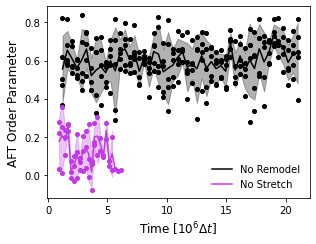

In [ ]:
folderhandles = ['NoRemodel_Xstretch100/','NoStretch/']
folderhandle1 = folderhandles[0]
seeds = "1 2 3 4 5".split()
labels = ['No Remodel', 'No Stretch']

fig,ax = plt.subplots(figsize = (4.5,3.5))
for ff in range(2):
    all_data = []
    folderhandle = folderhandles[ff]
    if ff == 0 :
        seeds = "1 2 3 4 5".split()
    elif ff == 2:
        seeds = "1 2 3".split()

    for s in range(len(seeds)):
        datapath = datadir0+folderhandles[ff]+"/median_order_parameterWtNames_seed"+seeds[s]+".csv"
        OPdata = pd.read_csv(datapath, header = 'infer')
        OrderParameter = OPdata['median_order_parameter']
        FileNames = OPdata['file_name']
        OPdata['time'] = FileNames.apply(extract_time_from_filename)
       
        Time = OPdata['time']
        if ff==1:
            Time = np.multiply(Time, 2)  # Convert time to millions of frames
        all_data.append(OPdata[['time', 'median_order_parameter']])
        if s==0:
            seed1_data = OPdata

        ax.plot(np.divide(Time,1e6),OrderParameter,color=clrs[ff],linestyle='',marker = 'o',markersize = 4)
    # Combine and group
    combined = pd.concat(all_data)
    grouped = combined.groupby('time')['median_order_parameter']
    mean_OP = grouped.mean()
    std_OP = grouped.std()
    Time = mean_OP.index
    if ff == 1:
        Time = np.multiply(Time, 2)

    ax.plot(np.divide(Time,1e6), mean_OP.values, color=clrs[ff], label=labels[ff])
    ax.fill_between(np.divide(Time,1e6), mean_OP - std_OP, mean_OP + std_OP, color=clrs[ff], alpha=0.3)
ax.set_xlabel(r'Time [$10^6\Delta t$]', fontsize=12)
ax.set_ylabel('AFT Order Parameter', fontsize=12)
fig.tight_layout()
ax.legend(frameon=False)
fig.savefig(plotsdir+'AFT_OrderParameter_NoRemodelVsNoStretch.pdf')

/var/folders/wt/4tgp65891vd4l6wskkxdnvk40000gn/T/ipykernel_75700/107472449.py:64: RuntimeWarning: Mean of empty slice
  means = [np.nanmean(bin) for bin in binned_data]
/Users/billiemeadowcroft/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/var/folders/wt/4tgp65891vd4l6wskkxdnvk40000gn/T/ipykernel_75700/107472449.py:64: RuntimeWarning: Mean of empty slice
  means = [np.nanmean(bin) for bin in binned_data]
/Users/billiemeadowcroft/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Means of each bin: [nan, 0.5328548581347494, 0.5177176373354052, 0.5409480560115404, 0.5079980827156034, 0.5530758384288235, 0.5922195798509662] 
 [nan, 0.545789048163358, 0.5399550084750464, 0.5704466170757, 0.5461448433981455, 0.5831111205375255, 0.6221047746941]
Means of each bin: [nan, 0.5931591682172785, 0.4825967217891351, 0.5271789618680991, 0.5124112891403351, 0.4636820644784138, 0.46186536002100176] 
 [nan, 0.615573632131091, 0.55568234060571, 0.5794474655039514, 0.5604554105372055, 0.542264645986025, 0.502958659056036]
-4926000.0


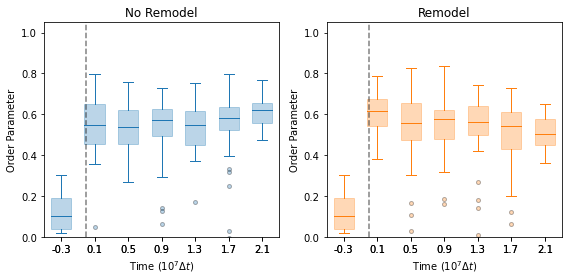

In [31]:

#folderhandles = ['NoRemodel/XStretch1.0_seed', 'Remodel/XStretch1.0_seed','NoStretch/NoStretch_dens0.05_seed']
folderhandles = ['NoRemodel_Xstretch100/','Remodel_Xstretch100/','NoStretch/']
fig, ax = plt.subplots(1,2,figsize=(8, 4))
labels = ['No Remodel', 'Remodel','Remodel']
clrs3 = ['tab:blue', 'tab:orange']
seeds = "1 2 3 4 5".split()

# Define bin edges for time (adjust as needed)
time_bins = np.linspace(-0.5e7, 2.3e7, 8)  # Change 0 and 10000 to your actual time range
bin_centers = 0.5 * (time_bins[1:] + time_bins[:-1])
param = "_54_4"  # Change to the desired parameter
for xx in range(3):  # For now just one condition
    #xx = 0  # Change to 0 for NoRemodel
    all_data = []
    #print(folderhandles[xx])
    if xx == 2:
        seeds = "1 2 3".split()
    for s in seeds:
        #if xx==1:
        datapath = datadir0+folderhandles[xx]+"/median_order_parameterWtNames"+param+"_seed"+s+".csv"
        #print(datapath)
        if xx==2:
            datapath = datadir0+folderhandles[xx]+"/median_order_parameterWtNames_seed"+s+".csv"
        OPdata = pd.read_csv(datapath, header='infer')
        OPdata['time'] = OPdata['file_name'].apply(extract_time_from_filename)
        all_data.append(OPdata[['time', 'median_order_parameter']])

    # Combine data
    combined = pd.concat(all_data)
    #combined['time_bin'] = combined['time_bin'].astype(float)
    # Assign bins
    #combined['time_bin'] = pd.cut(combined['time'], bins=time_bins, labels=bin_centers)
    if xx==0:
        StartingTime = combined['time'].min()
    if xx == 2 and StartingTime is not None:
        # Shift bin centers: convert to float
        combined['time'] = np.multiply(combined['time'].astype(float),2)
        shift = StartingTime - combined['time'].max()
        combined['time'] = np.add(combined['time'], shift) -(time_bins[1]-time_bins[0]) #*0.6
        print(shift)
    # Assign bins
    combined['time_bin'] = pd.cut(combined['time'], bins=time_bins, labels=bin_centers)
    combined = combined.dropna(subset=['time_bin'])

    # Prepare data for boxplot
    binned_data = [combined[combined['time_bin'] == bc]['median_order_parameter'] for bc in bin_centers]
    scaled_bin_centers = np.array(bin_centers) / 1e7
    if xx==2:
        for xxx in range(2):
            ax[xxx].boxplot(binned_data, positions=np.round(scaled_bin_centers,1), widths=np.diff(time_bins/1e7)*0.6, patch_artist=True,
               boxprops=dict(facecolor=clrs3[xxx], alpha=0.3, color=clrs3[xxx]),
               medianprops=dict(color=clrs3[xxx]),
               whiskerprops=dict(color=clrs3[xxx]),
               capprops=dict(color=clrs3[xxx]),
               flierprops=dict(markerfacecolor=clrs3[xxx], marker='o', alpha=0.3, markersize=4))
    else:
        ax[xx].boxplot(binned_data, positions=np.round(scaled_bin_centers,1), widths=np.diff(time_bins/1e7)*0.6, patch_artist=True,
                boxprops=dict(facecolor=clrs3[xx], alpha=0.3, color=clrs3[xx]),
                medianprops=dict(color=clrs3[xx]),
                whiskerprops=dict(color=clrs3[xx]),
                capprops=dict(color=clrs3[xx]),
                flierprops=dict(markerfacecolor=clrs3[xx], marker='o', alpha=0.3, markersize=4))
        text = labels[xx]
        means = [np.nanmean(bin) for bin in binned_data]
        medians = [np.nanmedian(bin) for bin in binned_data]
        print("Means of each bin:", means,'\n',medians)
        ax[xx].set_xlabel(r'Time ($10^7\Delta t$)')
        ax[xx].set_ylabel('Order Parameter')
        ax[xx].set_title(labels[xx])
        ax[xx].set_xlim(time_bins[0]/1e7, time_bins[-1]/1e7)
        ax[xx].plot([0,0],[0,1.2],color = 'black',linestyle='--',alpha=0.5)
        ax[xx].set_ylim(0, 1.05)
fig.tight_layout()
#fig.savefig(plotsdir + 'Boxplot_Comparison'+param+ '.pdf')

Getting some data for stretched networks